# Analysis

## Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

## Task #1: Merge all csv files into a dataset

In [2]:
files = [file for file in os.listdir("./data")]
df = pd.DataFrame()
for file in files:
    temp_df = pd.read_csv("./data/"+file)
    df = pd.concat([df, temp_df])
    
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
df.shape

(186850, 6)

## Augment data with additional columns

## Task #2: Add a 'Month' column 

In [4]:
df['Month'] = df['Order Date'].str[:2]
df.sample(6)
# Can't convert 'Month' to int as there are some NaN values so first have to tackle that

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
83,150582,Lightning Charging Cable,1,14.95,02/16/19 23:38,"678 Maple St, Seattle, WA 98101",02
15880,274504,USB-C Charging Cable,1,11.95,10/01/19 14:21,"623 Forest St, San Francisco, CA 94016",10
9812,185924,Apple Airpods Headphones,1,150,04/13/19 14:07,"484 5th St, San Francisco, CA 94016",04
6553,200317,Lightning Charging Cable,2,14.95,05/06/19 19:09,"370 13th St, Los Angeles, CA 90001",05
10581,204142,Lightning Charging Cable,1,14.95,05/12/19 20:50,"439 Cherry St, Portland, ME 04101",05
14395,273100,AAA Batteries (4-pack),1,2.99,10/13/19 23:20,"938 Main St, Seattle, WA 98101",10


In [5]:
temp = df[df.isnull().any(axis=1)]
temp.shape

(545, 7)

In [6]:
null_count = df.isnull().sum()
null_ratio = null_count/len(df)
null_ratio

Order ID            0.002917
Product             0.002917
Quantity Ordered    0.002917
Price Each          0.002917
Order Date          0.002917
Purchase Address    0.002917
Month               0.002917
dtype: float64

There are 537 null value rows having all columns null. They make around 0.2% of our entire so we can remove them.

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

In [9]:
# Some rows have a string 'Or' in their 'Month' column we have to remove them also
df = df[df['Month']!="Or"]

In [10]:
df[df['Month']=='Or'].count()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

In [11]:
# Now we can convert the 'Month' column into int data type
df[['Month', 'Price Each', 'Quantity Ordered']] = df[['Month', 'Price Each', 'Quantity Ordered']].apply(pd.to_numeric)

In [12]:
df['Month'].dtype

dtype('int64')

## Task #3: Add a 'Sales' column

In [13]:
df['Sales'] = df['Quantity Ordered']*df['Price Each']

## <span style="color: Red">Question 1: What was the best month for sales? How much was earned in that month?</span>

In [14]:
ms_df = df.groupby('Month')
max_sales_month = ms_df['Sales'].sum().idxmax()
max_sales = ms_df['Sales'].sum().max()
min_sales = ms_df['Sales'].sum().min()
min_sales_month = ms_df['Sales'].sum().idxmin()
"{:,}".format(max_sales), max_sales_month, "{:,}".format(min_sales), min_sales_month

('4,613,443.34', 12, '1,822,256.73', 1)

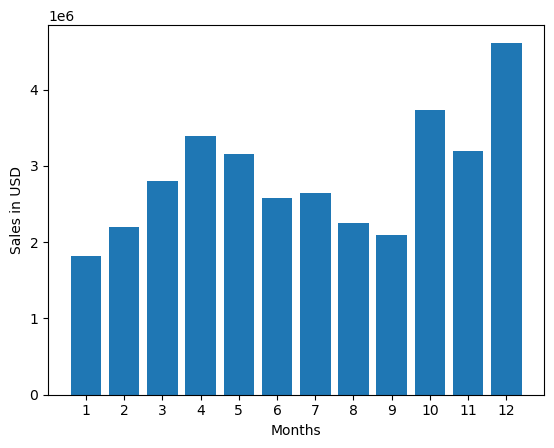

In [15]:
ms_df = ms_df.sum()
months = range(1, 13)
plt.bar(months, ms_df['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Months')
plt.show()

##  <span style="color:green">Insights:</span>
- The best month for sale was December with sales of 4,613,443.34 usd, while the worst month for sales was January with sales of 1,822,256.73 usd

## <span style="color: Red">Question #2: What city had the highest sales?</span>

### Adding a 'City' column

In [63]:
city = []
for address in df['Purchase Address']:
    cityname = address.split(', ')[1]
    code = address.split(', ')[2][:2]
    city.append(f"{cityname}, {code}")
df['City'] = city

In [69]:
max_Sales = df.groupby("City").sum().max()['Sales']
min_Sales = df.groupby("City").sum().min()['Sales']
"{:,}".format(max_Sales), "{:,}".format(min_Sales)

('8,262,203.91', '449,758.27')

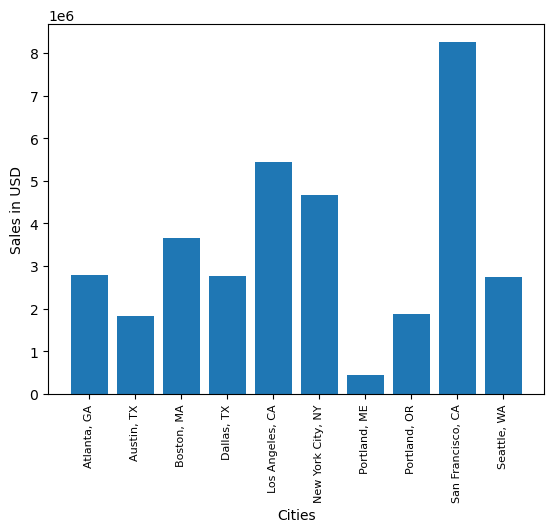

In [66]:
city_df = df.groupby("City").sum()
city_names = sorted(df['City'].unique())
plt.bar(city_names, city_df['Sales'])
plt.xticks(city_names, rotation=90, size=8)
plt.ylabel('Sales in USD')
plt.xlabel('Cities')
plt.show()

## <span style='color: Green'>Insights:</span>
- San Francisco, CA had the highest sales of USD 8,262,203.91. While the lowest sales were of Portland, ME of USD 449,758.27

## <span style='color:Red'>Question #3: What time should we display advertisements to maximize the likelihood of customer's buying products?

In [82]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hour'] = df['Order Date'].dt.hour

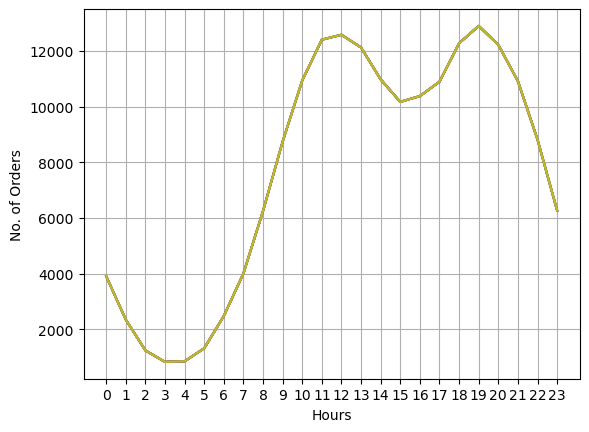

In [94]:
hours = range(24)

plt.plot(hours, df.groupby(['Hour']).count())
plt.xticks(hours)
plt.ylabel('No. of Orders')
plt.xlabel('Hours')
plt.grid()
plt.show()

## <span style='color: Green'>Insights:</span>
- From the above graph we can see that from 10:30 - 12 and from 17:30 - 20 maximium orders are being placed. So, during this time advertisement will yield maximum orders.

## <span style='color: Red'>Question #3: What products are most often sold together?</span>

In [106]:
bought_together_df = df[df['Order ID'].duplicated(keep=False)]
bought_together_df['Grouped'] = bought_together_df.groupby('Order ID')['Product'].transform(lambda x: ", ".join(x))

bought_together_df = bought_together_df[['Order ID', 'Grouped']].drop_duplicates()
bought_together_df.head()

C:\Users\Asad Mirza\AppData\Local\Temp\ipykernel_17092\225205345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bought_together_df['Grouped'] = bought_together_df.groupby('Order ID')['Product'].transform(lambda x: ", ".join(x))


,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [108]:
bought_together_df.shape

(7136, 2)

In [119]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in bought_together_df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

sum(count.values()) , count.most_common(1)

(7910, [(('iPhone', ' Lightning Charging Cable'), 1005)])

## <span style='color: Green'>Insights: </span>
- There are 7910 such orders in which two products have been bought together.
- The most common pair of products bought together are 'Iphone' and 'Lightning Charge Cable', 1005 orders.

## <span style='color:Red'> Question #4: What product sold the most? Why do you think it sold the most?</span>

In [159]:
most_sold_df = df.groupby('Product')
quantity = most_sold_df.sum()['Quantity Ordered']
products = [product for product, df in most_sold_df]
prices = most_sold_df.mean()['Price Each']

C:\Users\Asad Mirza\AppData\Local\Temp\ipykernel_17092\1293480863.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation=90, size=6)


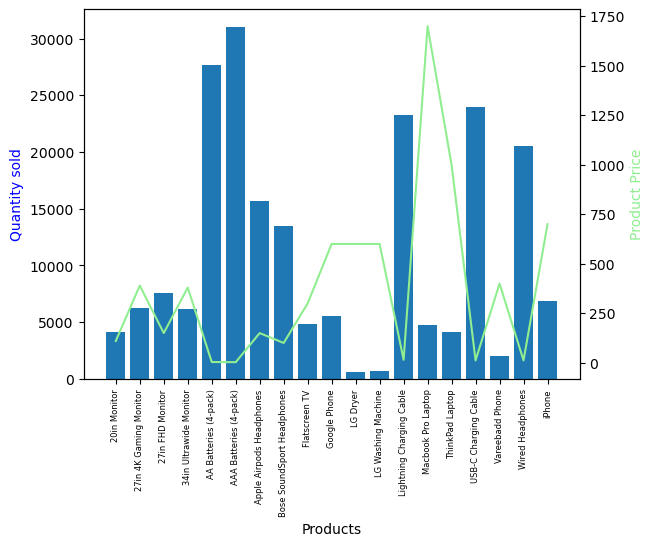

In [173]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity)
ax2.plot(products, prices, 'lightgreen')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity sold', color = 'blue')
ax2.set_ylabel("Product Price", color = 'lightgreen')
ax1.set_xticklabels(products, rotation=90, size=6)

plt.show()

## <span style='color: Green'>Insights: </span>
- The most sold product is 'AAA Batteries'. While the leas sold product is 'LG Dryer'.
- This may be due to the price of these products.
- As we can see that the Procduct Price and Quantity Sold follows a negative co-relation as we can observe from the graph. 